In [1]:
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim
from sklearn.metrics import classification_report
import torchvision
import math
import copy
from PIL import Image
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

In [66]:
image_x, image_y = 512, 512

In [2]:
metadata=pd.read_csv('D:/dataset/chest_X-ray_Dataset_tuberculosis/MetaData.csv')
data_y=metadata["tuberculosis is positive or not"] # где y это название колонки 0 и 1
metadata=metadata.drop("tuberculosis is positive or not",axis = 1)


df=[]
for i in range(int(len(metadata)/2)):
    image_path = f"D:/dataset/chest_X-ray_Dataset_tuberculosis/Chest-X-Ray/Chest-X-Ray/image/{metadata['id'][i]}.png"
    mask_path = f"D:/dataset/chest_X-ray_Dataset_tuberculosis/Chest-X-Ray/Chest-X-Ray/mask/{metadata['id'][i]}.png"

    with Image.open(image_path).convert("L") as image_image, Image.open(mask_path) as image_mask:
        image_image=image_image.resize((image_x, image_y), Image.Resampling.LANCZOS)
        image_mask=image_mask.resize((image_x, image_y), Image.Resampling.LANCZOS)

        image_image_array = np.array(image_image)
        image_mask_array = np.array(image_mask)

        try:
            array = image_image_array * image_mask_array
            flattened_array = array.flatten().tolist()
            # Запись результатов в файл для каждого изображения
            df.append(flattened_array)
        except Exception as e:
            print(f"Error processing {metadata['id'][i]}: {e}")


In [3]:
len(flattened_array)/512

512.0

In [4]:
len(df[0])/512

512.0

In [5]:
dataframe = pd.DataFrame({"x":df,"y":data_y[0:352]})

In [6]:
dataframe.to_csv("output.csv",encoding="utf-8",sep="\n")

In [7]:
img_ar = np.array(df[26]).reshape(512,512)

In [8]:
img_ar.shape


(512, 512)

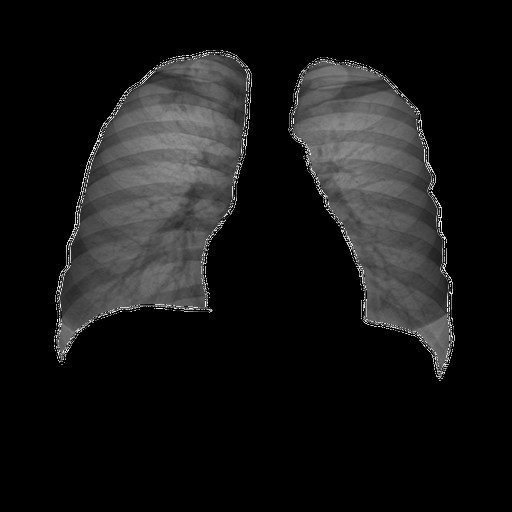

In [9]:
img = Image.fromarray(img_ar.astype(np.uint8))
img

In [10]:
df


[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [11]:
dataframe['y'].value_counts()

0    183
1    169
Name: y, dtype: int64

"/content/drive/MyDrive/chest_X-ray_Dataset_tuberculosis"

Обучение на последнем слое "ResNET50"


In [55]:
model_Resnet50 = torchvision.models.resnet50(pretrained=True)
model_Resnet50.fc = torch.nn.Sequential(
    torch.nn.Linear(
        in_features=2048,
        out_features=1
    ),
    torch.nn.Sigmoid()
)
model_Resnet50.conv1 = torch.nn.Conv2d(1,64, kernel_size=3,padding=1)

c:\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [56]:
model_Resnet50

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=Fal

In [57]:
USE_GPU = False
if torch.cuda.is_available():
  USE_GPU=True
EPOCHS = 5

In [58]:
random_index = 512

In [59]:
X, Y = df,data_y

In [60]:
train_data, test_data = train_test_split(dataframe, test_size=0.25,random_state=random_index )

In [61]:
train_data


x  y
140  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  1
149  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0
77   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0
215  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0
267  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  1
..                                                 ... ..
81   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0
157  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  1
237  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  1
131  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  1
265  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0

[264 rows x 2 columns]

In [62]:
test_data

x  y
99   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  1
273  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0
280  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  1
53   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  1
40   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0
..                                                 ... ..
289  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0
249  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  1
238  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  1
196  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  1
300  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0

[88 rows x 2 columns]

In [63]:


X_train = torch.tensor(np.vstack(train_data['x'].values).astype(int))
y_train = torch.tensor(np.vstack(train_data['y'].values).astype(int))

X_test = torch.tensor(np.vstack(test_data['x'].values).astype(int))
y_test = torch.tensor(np.vstack(test_data['y'].values).astype(int))

In [65]:
model = model_Resnet50
if USE_GPU:
    model = model.cuda()
optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.BCELoss()

best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0



batch_size = 1

# Создание датасетов
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Создание DataLoader'ов
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

best_acc = 0.0
train_hist = []
test_hist = []
for epoch in range(EPOCHS):
    for phase in ["train", "test"]:
        if phase == "train":
            model.train()
            data_loader = train_loader
        else:
            model.eval()
            data_loader = test_loader

        samples = 0
        loss_sum = 0
        correct_sum = 0

        for inputs, labels in data_loader:
            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs.resize(batch_size,1,image_x,image_y).float())
                loss = criterion(outputs.float(), labels.float())

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                loss_sum += loss.item() * inputs.size(0)  # Обновляем общий loss
                preds = torch.round(outputs)  # Предсказание: 0 или 1
                correct_sum += torch.sum(preds == labels.data)  # Считаем правильные предсказания

            samples += inputs.size(0)

        epoch_loss = loss_sum / samples
        epoch_acc = correct_sum.double() / samples

        print(f"Epoch {epoch+1}/{EPOCHS} - {phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")
        if phase == "train":
            train_hist.append(epoch_loss)
        else:
            test_hist.append(epoch_loss)
        # Копирование лучшей модели
        if phase == 'test' and epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(best_model_wts, "best_model.pth")


# Загрузка лучших весов модели
model.load_state_dict(best_model_wts)

C:\Users\макс\AppData\Roaming\Python\Python310\site-packages\torch\_tensor.py:775: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Epoch 1/5 - train Loss: 0.7053 Acc: 0.5568
Epoch 1/5 - test Loss: 0.6727 Acc: 0.5341
Epoch 2/5 - train Loss: 0.6887 Acc: 0.5795
Epoch 2/5 - test Loss: 1.6018 Acc: 0.6250
Epoch 3/5 - train Loss: 0.6578 Acc: 0.6250
Epoch 3/5 - test Loss: 0.7869 Acc: 0.4659
Epoch 4/5 - train Loss: 0.6571 Acc: 0.6250
Epoch 4/5 - test Loss: 0.5515 Acc: 0.8068
Epoch 5/5 - train Loss: 0.6583 Acc: 0.5985
Epoch 5/5 - test Loss: 0.5592 Acc: 0.7841


<All keys matched successfully>

In [71]:
torch.save(model,"model.pt")

In [86]:
predictionlist=[]
for inputs, labels in data_loader:
    optimizer.zero_grad()
    with torch.set_grad_enabled(phase == 'train'):
        outputs = model(inputs.resize(batch_size,1,image_x,image_y).float())
        loss = criterion(outputs.float(), labels.float())
        predictionlist.extend(torch.round(outputs.flatten()).tolist())
    


C:\Users\макс\AppData\Roaming\Python\Python310\site-packages\torch\_tensor.py:775: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [90]:
predictions = [int(item) for item in predictionlist]

In [92]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        40
           1       0.88      0.75      0.81        48

    accuracy                           0.81        88
   macro avg       0.81      0.81      0.81        88
weighted avg       0.82      0.81      0.81        88



In [ ]:
p

In [ ]:
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
plt.ylim((0, 5))
plt.legend();